# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras` (that is in fact embedded inside a larger library called `tensorflow`, but we will not discuss `tensorflow` in this course).
You should visit [`keras` webpage](https://www.tensorflow.org/guide/keras/overview) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [3]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [4]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [ ]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [5]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist, boston_housing
from tensorflow.keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train, x_test, y_train, y_test = prepare_boston()

57026/57026 [==============================] - 0s 0us/step


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [7]:
import numpy as np
dimX = np.shape(x_train)[1]

input_layer = InputLayer(input_shape=(dimX,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])

model.compile(optimizer="sgd", loss="mse", metrics=["mse"])

h=model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=100)
print(h.history)

Epoch 1/10
5/5 - 1s - loss: 1.0081 - mse: 1.0081 - 512ms/epoch - 102ms/step
Epoch 2/10
5/5 - 0s - loss: 0.4968 - mse: 0.4968 - 14ms/epoch - 3ms/step
Epoch 3/10
5/5 - 0s - loss: 0.2693 - mse: 0.2693 - 14ms/epoch - 3ms/step
Epoch 4/10
5/5 - 0s - loss: 0.1713 - mse: 0.1713 - 13ms/epoch - 3ms/step
Epoch 5/10
5/5 - 0s - loss: 0.1154 - mse: 0.1154 - 17ms/epoch - 3ms/step
Epoch 6/10
5/5 - 0s - loss: 0.0950 - mse: 0.0950 - 13ms/epoch - 3ms/step
Epoch 7/10
5/5 - 0s - loss: 0.0842 - mse: 0.0842 - 12ms/epoch - 2ms/step
Epoch 8/10
5/5 - 0s - loss: 0.0782 - mse: 0.0782 - 13ms/epoch - 3ms/step
Epoch 9/10
5/5 - 0s - loss: 0.0754 - mse: 0.0754 - 14ms/epoch - 3ms/step
Epoch 10/10
5/5 - 0s - loss: 0.0737 - mse: 0.0737 - 15ms/epoch - 3ms/step
{'loss': [1.0081490278244019, 0.4967673420906067, 0.2693397104740143, 0.17126791179180145, 0.11542278528213501, 0.09499181807041168, 0.08415966480970383, 0.07821202278137207, 0.07540690898895264, 0.07365700602531433], 'mse': [1.0081490278244019, 0.4967673420906067, 

**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [8]:
x_train, x_test, y_train, y_test = prepare_mnist()

10
Epoch 1/10
300/300 - 1s - loss: 1.4899 - accuracy: 0.6381 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.8627 - accuracy: 0.8196 - 841ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.6917 - accuracy: 0.8429 - 867ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.6090 - accuracy: 0.8550 - 768ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.5587 - accuracy: 0.8634 - 774ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.5243 - accuracy: 0.8688 - 799ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.4989 - accuracy: 0.8736 - 789ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.4792 - accuracy: 0.8765 - 804ms/epoch - 3ms/step
Epoch 9/10
300/300 - 1s - loss: 0.4634 - accuracy: 0.8796 - 798ms/epoch - 3ms/step
Epoch 10/10
300/300 - 1s - loss: 0.4503 - accuracy: 0.8825 - 785ms/epoch - 3ms/step


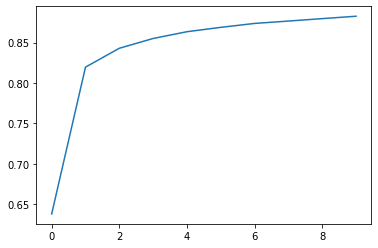

In [9]:
dimX = np.shape(x_train)[1]
dimY = np.shape(y_train)[1]
print(dimY)
input_layer = InputLayer(input_shape=(dimX,))
output_layer = Dense(units=dimY, activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

import matplotlib.pyplot as plt
h=model.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

plt.plot(h.history["accuracy"])
plt.show()

**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [10]:
input_layer = InputLayer(input_shape=(dimX,))
output_layer = Dense(units=dimY, activation="softmax")
hidden_layer1 = Dense(units=128, activation="relu")
hidden_layer2 = Dense(units=128, activation="relu")
hidden_layer3 = Dense(units=128, activation="relu")

model1 = Sequential([
    InputLayer(input_shape=(dimX,)),
    Dense(units=128, activation="relu"),
    Dense(units=dimY, activation="softmax")
])
model1.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

print("------------- Model 1 ----------------")
model1.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

model2 = Sequential([
    InputLayer(input_shape=(dimX,)),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=dimY, activation="softmax")
])
model2.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
print("------------- Model 2 ----------------")

model2.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

model3 = Sequential([
    InputLayer(input_shape=(dimX,)),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=dimY, activation="softmax")

])
model3.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
print("------------- Model 3 ----------------")

model3.fit(x_train, y_train, verbose=2, epochs=10, batch_size=200)

------------- Model 1 ----------------
Epoch 1/10
300/300 - 2s - loss: 1.3688 - accuracy: 0.6705 - 2s/epoch - 6ms/step
Epoch 2/10
300/300 - 1s - loss: 0.6831 - accuracy: 0.8440 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 2s - loss: 0.5236 - accuracy: 0.8688 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 2s - loss: 0.4545 - accuracy: 0.8811 - 2s/epoch - 8ms/step
Epoch 5/10
300/300 - 2s - loss: 0.4146 - accuracy: 0.8888 - 2s/epoch - 7ms/step
Epoch 6/10
300/300 - 2s - loss: 0.3880 - accuracy: 0.8937 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.3684 - accuracy: 0.8981 - 2s/epoch - 7ms/step
Epoch 8/10
300/300 - 1s - loss: 0.3531 - accuracy: 0.9014 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s - loss: 0.3405 - accuracy: 0.9046 - 1s/epoch - 4ms/step
Epoch 10/10
300/300 - 1s - loss: 0.3300 - accuracy: 0.9079 - 1s/epoch - 4ms/step
------------- Model 2 ----------------
Epoch 1/10
300/300 - 2s - loss: 1.5702 - accuracy: 0.6105 - 2s/epoch - 7ms/step
Epoch 2/10
300/300 - 2s - loss: 0.6704 - 

**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [11]:
print(model1.count_params())
print(model2.count_params())
model3.count_params()

101770
118282


134794

In [12]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://www.tensorflow.org/guide/keras/train_and_evaluate#automatically_setting_apart_a_validation_holdout_set) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [13]:
model3_bis = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model 3 ----------------")

model3_bis.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model3_bis.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

print("------------- Model 1 ----------------")
model1_bis = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model1_bis.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model1_bis.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

------------- Model 3 ----------------
Epoch 1/10
420/420 - 3s - loss: 1.4555 - accuracy: 0.6154 - val_loss: 0.6783 - val_accuracy: 0.8283 - 3s/epoch - 7ms/step
Epoch 2/10
420/420 - 2s - loss: 0.5237 - accuracy: 0.8585 - val_loss: 0.4088 - val_accuracy: 0.8854 - 2s/epoch - 5ms/step
Epoch 3/10
420/420 - 2s - loss: 0.3822 - accuracy: 0.8929 - val_loss: 0.3459 - val_accuracy: 0.8999 - 2s/epoch - 6ms/step
Epoch 4/10
420/420 - 2s - loss: 0.3298 - accuracy: 0.9063 - val_loss: 0.3072 - val_accuracy: 0.9103 - 2s/epoch - 5ms/step
Epoch 5/10
420/420 - 2s - loss: 0.2984 - accuracy: 0.9145 - val_loss: 0.2863 - val_accuracy: 0.9169 - 2s/epoch - 6ms/step
Epoch 6/10
420/420 - 2s - loss: 0.2763 - accuracy: 0.9212 - val_loss: 0.2709 - val_accuracy: 0.9201 - 2s/epoch - 6ms/step
Epoch 7/10
420/420 - 2s - loss: 0.2586 - accuracy: 0.9260 - val_loss: 0.2577 - val_accuracy: 0.9252 - 2s/epoch - 5ms/step
Epoch 8/10
420/420 - 2s - loss: 0.2434 - accuracy: 0.9298 - val_loss: 0.2454 - val_accuracy: 0.9289 - 2s/ep

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [14]:
model3_bis = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model 3 ----------------")

model3_bis.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model3_bis.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

print("------------- Model 1 ----------------")
model1_bis = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model1_bis.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model1_bis.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

------------- Model 3 ----------------
Epoch 1/10
420/420 - 3s - loss: 0.3384 - accuracy: 0.9022 - val_loss: 0.1792 - val_accuracy: 0.9458 - 3s/epoch - 8ms/step
Epoch 2/10
420/420 - 3s - loss: 0.1308 - accuracy: 0.9610 - val_loss: 0.1254 - val_accuracy: 0.9622 - 3s/epoch - 6ms/step
Epoch 3/10
420/420 - 3s - loss: 0.0874 - accuracy: 0.9732 - val_loss: 0.1180 - val_accuracy: 0.9645 - 3s/epoch - 6ms/step
Epoch 4/10
420/420 - 3s - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.1019 - val_accuracy: 0.9693 - 3s/epoch - 6ms/step
Epoch 5/10
420/420 - 2s - loss: 0.0500 - accuracy: 0.9841 - val_loss: 0.1295 - val_accuracy: 0.9624 - 2s/epoch - 6ms/step
Epoch 6/10
420/420 - 2s - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.1006 - val_accuracy: 0.9728 - 2s/epoch - 6ms/step
Epoch 7/10
420/420 - 2s - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.1127 - val_accuracy: 0.9706 - 2s/epoch - 6ms/step
Epoch 8/10
420/420 - 2s - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0983 - val_accuracy: 0.9743 - 2s/ep

**Question #8.** Using [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

------------- Model ----------------
Epoch 1/10
420/420 - 3s - loss: 162557.8281 - accuracy: 0.1021 - val_loss: 21677.3066 - val_accuracy: 0.1005 - 3s/epoch - 8ms/step
Epoch 2/10
420/420 - 2s - loss: 6879.2783 - accuracy: 0.1017 - val_loss: 2.4184 - val_accuracy: 0.0966 - 2s/epoch - 6ms/step
Epoch 3/10
420/420 - 2s - loss: 747.6347 - accuracy: 0.1030 - val_loss: 2.3635 - val_accuracy: 0.0909 - 2s/epoch - 6ms/step
Epoch 4/10
420/420 - 3s - loss: 2.4140 - accuracy: 0.0991 - val_loss: 2.3568 - val_accuracy: 0.0966 - 3s/epoch - 6ms/step
Epoch 5/10
420/420 - 3s - loss: 2.4191 - accuracy: 0.1010 - val_loss: 2.5562 - val_accuracy: 0.1006 - 3s/epoch - 6ms/step
Epoch 6/10
420/420 - 3s - loss: 2.4338 - accuracy: 0.1001 - val_loss: 2.3758 - val_accuracy: 0.0989 - 3s/epoch - 6ms/step
Epoch 7/10
420/420 - 3s - loss: 2.4222 - accuracy: 0.1032 - val_loss: 2.5151 - val_accuracy: 0.1006 - 3s/epoch - 6ms/step
Epoch 8/10
420/420 - 3s - loss: 2.4272 - accuracy: 0.1006 - val_loss: 2.3825 - val_accuracy: 0.

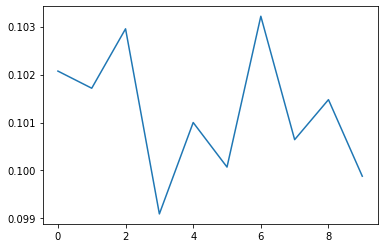

In [15]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model ----------------")

import tensorflow as tf

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=3), metrics=["accuracy"])
h=model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)
plt.plot(h.history["accuracy"])
plt.show()

------------- Model ----------------
Epoch 1/10
420/420 - 3s - loss: 2.1509 - accuracy: 0.2972 - val_loss: 1.9592 - val_accuracy: 0.5897 - 3s/epoch - 8ms/step
Epoch 2/10
420/420 - 2s - loss: 1.6893 - accuracy: 0.6855 - val_loss: 1.3873 - val_accuracy: 0.7443 - 2s/epoch - 6ms/step
Epoch 3/10
420/420 - 2s - loss: 1.1492 - accuracy: 0.7666 - val_loss: 0.9372 - val_accuracy: 0.8036 - 2s/epoch - 5ms/step
Epoch 4/10
420/420 - 3s - loss: 0.8188 - accuracy: 0.8215 - val_loss: 0.6995 - val_accuracy: 0.8476 - 3s/epoch - 6ms/step
Epoch 5/10
420/420 - 4s - loss: 0.6433 - accuracy: 0.8515 - val_loss: 0.5714 - val_accuracy: 0.8664 - 4s/epoch - 9ms/step
Epoch 6/10
420/420 - 2s - loss: 0.5426 - accuracy: 0.8677 - val_loss: 0.4942 - val_accuracy: 0.8787 - 2s/epoch - 6ms/step
Epoch 7/10
420/420 - 2s - loss: 0.4783 - accuracy: 0.8801 - val_loss: 0.4434 - val_accuracy: 0.8862 - 2s/epoch - 6ms/step
Epoch 8/10
420/420 - 3s - loss: 0.4345 - accuracy: 0.8874 - val_loss: 0.4082 - val_accuracy: 0.8930 - 3s/epoc

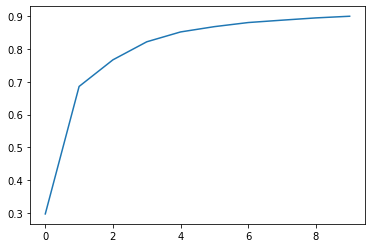

In [16]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model ----------------")

import tensorflow as tf

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
h=model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)
plt.plot(h.history["accuracy"])
plt.show()

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [17]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print("------------- Model ----------------")

import tensorflow as tf

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
h=model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)


------------- Model ----------------
Epoch 1/10
420/420 - 4s - loss: 0.3331 - accuracy: 0.9049 - val_loss: 0.1704 - val_accuracy: 0.9504 - 4s/epoch - 9ms/step
Epoch 2/10
420/420 - 3s - loss: 0.1270 - accuracy: 0.9624 - val_loss: 0.1416 - val_accuracy: 0.9585 - 3s/epoch - 6ms/step
Epoch 3/10
420/420 - 3s - loss: 0.0886 - accuracy: 0.9724 - val_loss: 0.1121 - val_accuracy: 0.9665 - 3s/epoch - 6ms/step
Epoch 4/10
420/420 - 3s - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.1178 - val_accuracy: 0.9669 - 3s/epoch - 6ms/step
Epoch 5/10
420/420 - 3s - loss: 0.0496 - accuracy: 0.9835 - val_loss: 0.1151 - val_accuracy: 0.9687 - 3s/epoch - 7ms/step
Epoch 6/10
420/420 - 3s - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.1066 - val_accuracy: 0.9707 - 3s/epoch - 7ms/step
Epoch 7/10
420/420 - 3s - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.1220 - val_accuracy: 0.9683 - 3s/epoch - 7ms/step
Epoch 8/10
420/420 - 2s - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.1245 - val_accuracy: 0.9688 - 2s/epoc

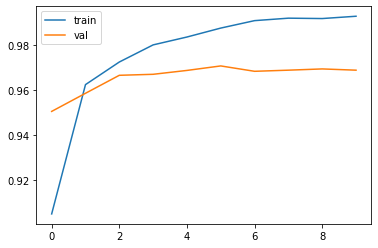

In [18]:
plt.plot(h.history["accuracy"], label="train")
plt.plot(h.history["val_accuracy"], label="val")
plt.legend()
plt.show()


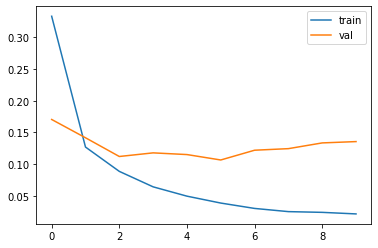

In [19]:
plt.plot(h.history["loss"], label="train")
plt.plot(h.history["val_loss"], label="val")
plt.legend()
plt.show()

In [20]:
print(h.history)

{'loss': [0.3331272304058075, 0.12697984278202057, 0.08862686902284622, 0.06426150351762772, 0.04957405477762222, 0.03869504854083061, 0.030237827450037003, 0.025196149945259094, 0.02404431253671646, 0.021585147827863693], 'accuracy': [0.9048571586608887, 0.9623571634292603, 0.9724047780036926, 0.9800238013267517, 0.9835237860679626, 0.987500011920929, 0.9908095002174377, 0.9919047355651855, 0.9917380809783936, 0.9927619099617004], 'val_loss': [0.17043669521808624, 0.141614630818367, 0.11209223419427872, 0.11780025064945221, 0.11512365937232971, 0.10658016800880432, 0.1219746395945549, 0.12445566058158875, 0.13349266350269318, 0.1355777382850647], 'val_accuracy': [0.9504444599151611, 0.9585000276565552, 0.9664999842643738, 0.9669444561004639, 0.968666672706604, 0.9706666469573975, 0.9682777523994446, 0.9687777757644653, 0.9693333506584167, 0.9687777757644653]}


Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.hdf5` on your Deepnote project. Only record models if validation loss is lower than for all previous models.

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint



tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
cb = ModelCheckpoint("model.hdf5", save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=1, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2942 - accuracy: 0.9182 - val_loss: 0.1478 - val_accuracy: 0.9539
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1162 - accuracy: 0.9656 - val_loss: 0.1038 - val_accuracy: 0.9675
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0834 - val_accuracy: 0.9739
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0836 - val_accuracy: 0.9734
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0719 - val_accuracy: 0.9778
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0769 - val_accuracy: 0.9766
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0734 - val_accuracy: 0.9778
Epoch 

Use the code below to check that a model has been saved:

In [31]:
!ls -alh "model.hdf5"

-rw-r--r-- 1 root root 1.4M Nov  7 13:46 model.hdf5


## Regularization

**Question #11.** Add an $\ell_2$ regularization to the weights of your model and show its impact on overfitting. [These docs](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers) could help.

In [33]:

from tensorflow.keras.regularizers import l2

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=y_train.shape[1], activation="softmax", kernel_regularizer=l2(.001))
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 4s - loss: 0.5847 - accuracy: 0.9015 - val_loss: 0.3803 - val_accuracy: 0.9492 - 4s/epoch - 7ms/step
Epoch 2/10
480/480 - 3s - loss: 0.3449 - accuracy: 0.9533 - val_loss: 0.3202 - val_accuracy: 0.9578 - 3s/epoch - 6ms/step
Epoch 3/10
480/480 - 2s - loss: 0.2868 - accuracy: 0.9641 - val_loss: 0.2756 - val_accuracy: 0.9657 - 2s/epoch - 5ms/step
Epoch 4/10
480/480 - 3s - loss: 0.2599 - accuracy: 0.9680 - val_loss: 0.2586 - val_accuracy: 0.9663 - 3s/epoch - 6ms/step
Epoch 5/10
480/480 - 3s - loss: 0.2442 - accuracy: 0.9703 - val_loss: 0.2530 - val_accuracy: 0.9666 - 3s/epoch - 6ms/step
Epoch 6/10
480/480 - 2s - loss: 0.2342 - accuracy: 0.9729 - val_loss: 0.2393 - val_accuracy: 0.9693 - 2s/epoch - 5ms/step
Epoch 7/10
480/480 - 2s - loss: 0.2280 - accuracy: 0.9740 - val_loss: 0.2379 - val_accuracy: 0.9697 - 2s/epoch - 5ms/step
Epoch 8/10
480/480 - 2s - loss: 0.2204 - accuracy: 0.9763 - val_loss: 0.2320 - val_accuracy: 0.9705 - 2s/epoch - 5ms/step
Epoch 9/10
480/480 - 2s 

**Question #12.** Instead of the $\ell_2$ regularization, set up a [drop-out](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) strategy and assess its impact on overfitting (you will turn off 10% of the neurons at each training batch).

In [35]:
from tensorflow.keras.layers import Dropout

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 3s - loss: 0.4031 - accuracy: 0.8811 - val_loss: 0.1542 - val_accuracy: 0.9552 - 3s/epoch - 7ms/step
Epoch 2/10
480/480 - 3s - loss: 0.1705 - accuracy: 0.9487 - val_loss: 0.1192 - val_accuracy: 0.9640 - 3s/epoch - 6ms/step
Epoch 3/10
480/480 - 3s - loss: 0.1284 - accuracy: 0.9598 - val_loss: 0.1021 - val_accuracy: 0.9682 - 3s/epoch - 6ms/step
Epoch 4/10
480/480 - 3s - loss: 0.1056 - accuracy: 0.9677 - val_loss: 0.0903 - val_accuracy: 0.9717 - 3s/epoch - 6ms/step
Epoch 5/10
480/480 - 3s - loss: 0.0905 - accuracy: 0.9709 - val_loss: 0.0887 - val_accuracy: 0.9721 - 3s/epoch - 6ms/step
Epoch 6/10
480/480 - 3s - loss: 0.0765 - accuracy: 0.9752 - val_loss: 0.0825 - val_accuracy: 0.9738 - 3s/epoch - 6ms/step
Epoch 7/10
480/480 - 3s - loss: 0.0712 - accuracy: 0.9777 - val_loss: 0.0807 - val_accuracy: 0.9762 - 3s/epoch - 6ms/step
Epoch 8/10
480/480 - 3s - loss: 0.0635 - accuracy: 0.9792 - val_loss: 0.0781 - val_accuracy: 0.9762 - 3s/epoch - 6ms/step
Epoch 9/10
480/480 - 3s 

**Question #13.** Set up an [`EarlyStopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

tf.random.set_seed(0)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100
600/600 - 4s - loss: 0.2942 - accuracy: 0.9182 - val_loss: 0.1478 - val_accuracy: 0.9539 - 4s/epoch - 6ms/step
Epoch 2/100
600/600 - 3s - loss: 0.1162 - accuracy: 0.9656 - val_loss: 0.1038 - val_accuracy: 0.9675 - 3s/epoch - 5ms/step
Epoch 3/100
600/600 - 3s - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0834 - val_accuracy: 0.9739 - 3s/epoch - 4ms/step
Epoch 4/100
600/600 - 3s - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0836 - val_accuracy: 0.9734 - 3s/epoch - 5ms/step
Epoch 5/100
600/600 - 3s - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0719 - val_accuracy: 0.9778 - 3s/epoch - 5ms/step
Epoch 6/100
600/600 - 4s - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0769 - val_accuracy: 0.9766 - 4s/epoch - 6ms/step
Epoch 7/100
600/600 - 3s - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0734 - val_accuracy: 0.9778 - 3s/epoch - 4ms/step
Epoch 8/100
600/600 - 3s - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0799 - val_accuracy: 0.9774 - 3s/epoch - 4ms/step
